In [1]:
cd /Users/dcox/Dropbox/InsightFellowship/Glimpse/Redacted & Subset Data/

/Users/dcox/Dropbox/InsightFellowship/Glimpse/Redacted & Subset Data


# Baseline models for Glimpse K12. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Define functions. 

In [3]:
def lin_metrics(x, y):
    ''' Prints four common metrics for evaluating regression predictions. '''
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(x, y), 4))
    print('Mean Squared Error:', round(metrics.mean_squared_error(x, y), 4))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(x, y)), 4))
    print('R^2 Math:,', round(r2_score(y_test, y_pred), 4))

def bin_metrics(x, y):
    '''Prints four common metrics for evaluating classification predictions.'''
    print('Accuracy:', round(metrics.accuracy_score(x, y), 4))
    print('Precision:', round(metrics.precision_score(x, y), 4))
    print('Recall:', round(recall_score(x, y), 4))
    print('ROC_AUC:,', round(roc_auc_score(x, y), 4))
    print('F1:', round(f1_score(x, y), 4))

def plot_scatter(x, y, xmin=None, xmax=None, ymin=None, ymax=None):
    '''Plots simple scatter plot of two datasets. We'll use to plot scatter of residuals.'''
    plt.scatter(y_test, y_pred, color='black')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Observed', fontsize=16)
    return plt.show()

def plot_residuals(x, y):
    '''Plot historgram of residuals.'''
    residuals = x - y
    plt.hist(residuals, bins=50, color='black')
    plt.xlabel('Residual')
    plt.ylabel('Num Observations')
    plt.show()

def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')# font size

# Baseline models for dfs with continuous outcome variables = linear regression. 

### Read in the data

In [4]:
most_obs = pd.read_csv('most_obs_cont.csv')
most_feats = pd.read_csv('most_feats_cont.csv')

### Set up dfs for predictor and outcome variables 

In [5]:
mostObs_MathOutc = most_obs['ScantronMathPostTest']
mostObs_ReadOutc = most_obs['ScantronReadingPostTest']
mostObs_pred = most_obs.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)
mostFeats_MathOutc = most_feats['ScantronMathPostTest']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTest']
mostFeats_pred = most_feats.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)

#### Recode categorical strings with number labels and save those dictionaries

In [6]:
# Most observations df
mostObs_predCols = list(mostObs_pred)
mostObs_predCodes = []
for i in mostObs_predCols:
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    d = dict(enumerate(mostObs_pred[i].cat.categories))
    mostObs_predCodes.append(d)
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    mostObs_pred[i] = mostObs_pred[i].cat.codes

# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

### Predicting outcomes for using the 'most observations' df and linear regression baseline model. 

Mean Absolute Error: 1114.5305
Mean Squared Error: 1455149.3343
Root Mean Squared Error: 1206.2957
R^2 Math:, 0.1294


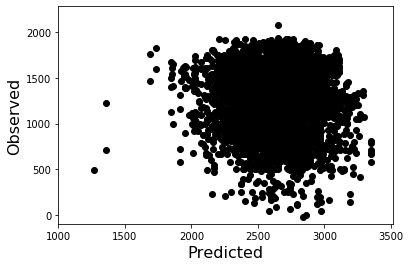

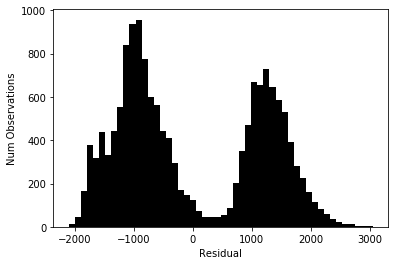

In [7]:
from sklearn.linear_model import LinearRegression
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
lin_metrics(y_test, y_pred)
plot_scatter(y_pred, y_test, xmin=1000, ymin=-100)
plot_residuals(y_test, y_pred)

Mean Absolute Error: 1198.1534
Mean Squared Error: 1693734.3112
Root Mean Squared Error: 1301.4355
R^2 Math:, 0.1249


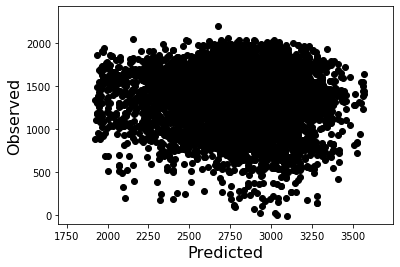

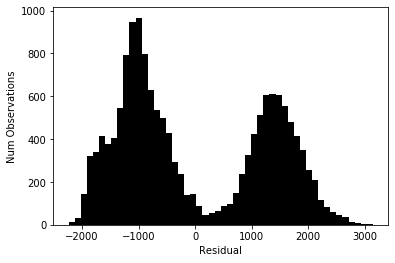

In [8]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
lin_metrics(y_test, y_pred)
plot_scatter(y_pred, y_test, xmin=1700, ymin=-100)
plot_residuals(y_test, y_pred)

### Predicting outcomes for using the 'most features' df. 

Mean Absolute Error: 118.5889
Mean Squared Error: 98614.7084
Root Mean Squared Error: 314.0298
R^2 Math:, 0.323


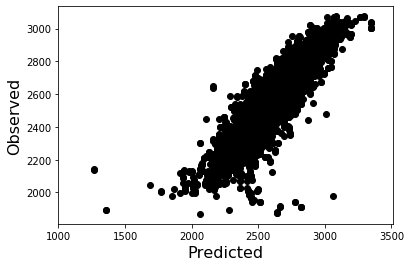

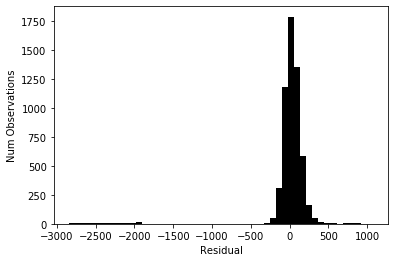

In [9]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
lin_metrics(y_test, y_pred)
plot_scatter(y_pred, y_test, xmin=1000)
plot_residuals(y_test, y_pred)

Mean Absolute Error: 206.9938
Mean Squared Error: 192530.2368
Root Mean Squared Error: 438.7827
R^2 Math:, 0.4257


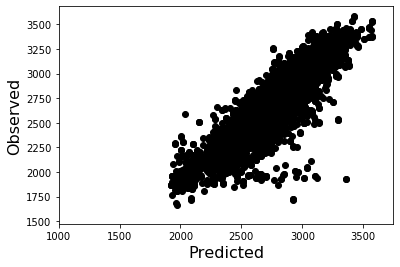

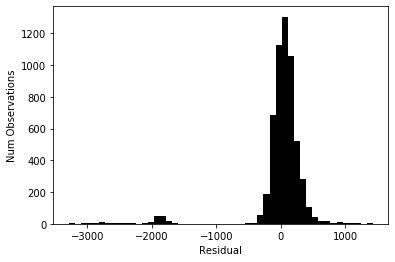

In [10]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
lin_metrics(y_test, y_pred)
plot_scatter(y_pred, y_test, xmin=1000)
plot_residuals(y_test, y_pred)

# Baseline models for dfs with binary outcome variables = logistics regression. 

### Read in data

In [11]:
most_obs = pd.read_csv('most_obs_binary.csv')
most_feats = pd.read_csv('most_feats_binary.csv')

In [12]:
mostObs_MathOutc = most_obs['ScantronMathPostTestBenchmarks']
mostObs_ReadOutc = most_obs['ScantronReadingPostTestBenchmarks']
mostObs_pred = most_obs.drop(['ScantronMathPostTestBenchmarks', 'ScantronReadingPostTestBenchmarks'], axis=1)
mostFeats_MathOutc = most_feats['ScantronMathPostTestBenchmarks']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTestBenchmarks']
mostFeats_pred = most_feats.drop(['ScantronMathPostTestBenchmarks', 'ScantronReadingPostTestBenchmarks'], axis=1)

In [13]:
# Most observations df
mostObs_predCols = list(mostObs_pred)
mostObs_predCodes = []
for i in mostObs_predCols:
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    d = dict(enumerate(mostObs_pred[i].cat.categories))
    mostObs_predCodes.append(d)
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    mostObs_pred[i] = mostObs_pred[i].cat.codes

# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

### Predicting outcomes for the 'most observations ' df. 

Accuracy: 0.7842
Precision: 0.8529
Recall: 0.6886
ROC_AUC:, 0.7845
F1: 0.762


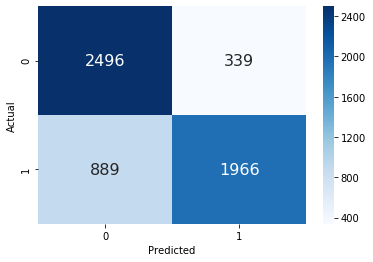

In [15]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
bin_metrics(y_test, y_pred)
plot_cm(y_test, y_pred)

Accuracy: 0.7645
Precision: 0.7752
Recall: 0.9673
ROC_AUC:, 0.5584
F1: 0.8607


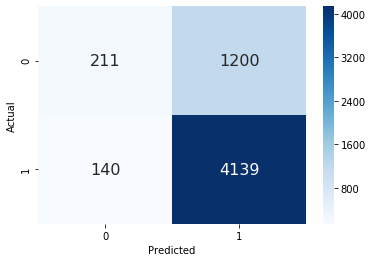

In [16]:
# Read outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
bin_metrics(y_test, y_pred)
plot_cm(y_test, y_pred)

## Predicting outcomes for the 'most features' df. 

Accuracy: 0.7795
Precision: 0.8565
Recall: 0.69
ROC_AUC:, 0.7828
F1: 0.7643


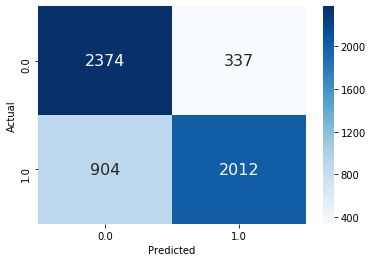

In [17]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
bin_metrics(y_test, y_pred)
plot_cm(y_test, y_pred)

Accuracy: 0.7716
Precision: 0.7723
Recall: 0.9963
ROC_AUC:, 0.5127
F1: 0.8701


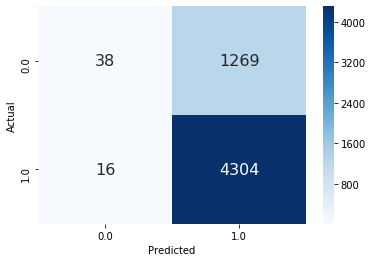

In [18]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
bin_metrics(y_test, y_pred)
plot_cm(y_test, y_pred)

Text(0, 0.5, 'Number of Observations')

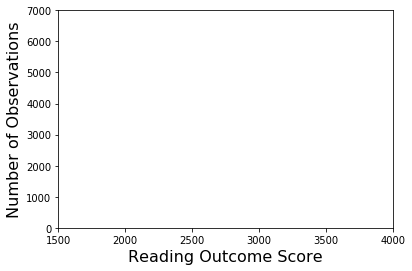

In [19]:
plt.hist(mostObs_ReadOutc, color='black', bins=40)
plt.xlim(1500, 4000)
plt.ylim(0, 7000)
plt.xlabel('Reading Outcome Score', fontsize=16)
plt.ylabel('Number of Observations', fontsize=16)

In [20]:
most_obs = pd.read_csv('most_obs_cont.csv')
most_feats = pd.read_csv('most_feats_cont.csv')
mostObs_MathOutc = most_obs['ScantronMathPostTest']
mostObs_ReadOutc = most_obs['ScantronReadingPostTest']
mostObs_pred = most_obs.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)
mostFeats_MathOutc = most_feats['ScantronMathPostTest']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTest']
mostFeats_pred = most_feats.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)